In [270]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [271]:
df = pd.read_csv('college_student_placement_dataset.csv')

In [272]:
df.head(4)

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No


In [273]:
df['Placement'].value_counts()

Placement
No     8341
Yes    1659
Name: count, dtype: int64

In [274]:
df.drop(columns='College_ID' , inplace=True)

In [275]:
ord_data={'Yes':1,'No':0}
df['Placement']=df['Placement'].map(ord_data)
df['Internship_Experience']=df['Internship_Experience'].map(ord_data)
df.head(4)

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,0,8,8,4,0
1,97,5.52,5.37,8,0,7,8,0,0
2,109,5.36,5.83,9,0,3,1,1,0
3,122,5.47,5.75,6,1,1,6,1,0


In [276]:
df.shape

(10000, 9)

In [277]:
df.isnull().sum()

IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

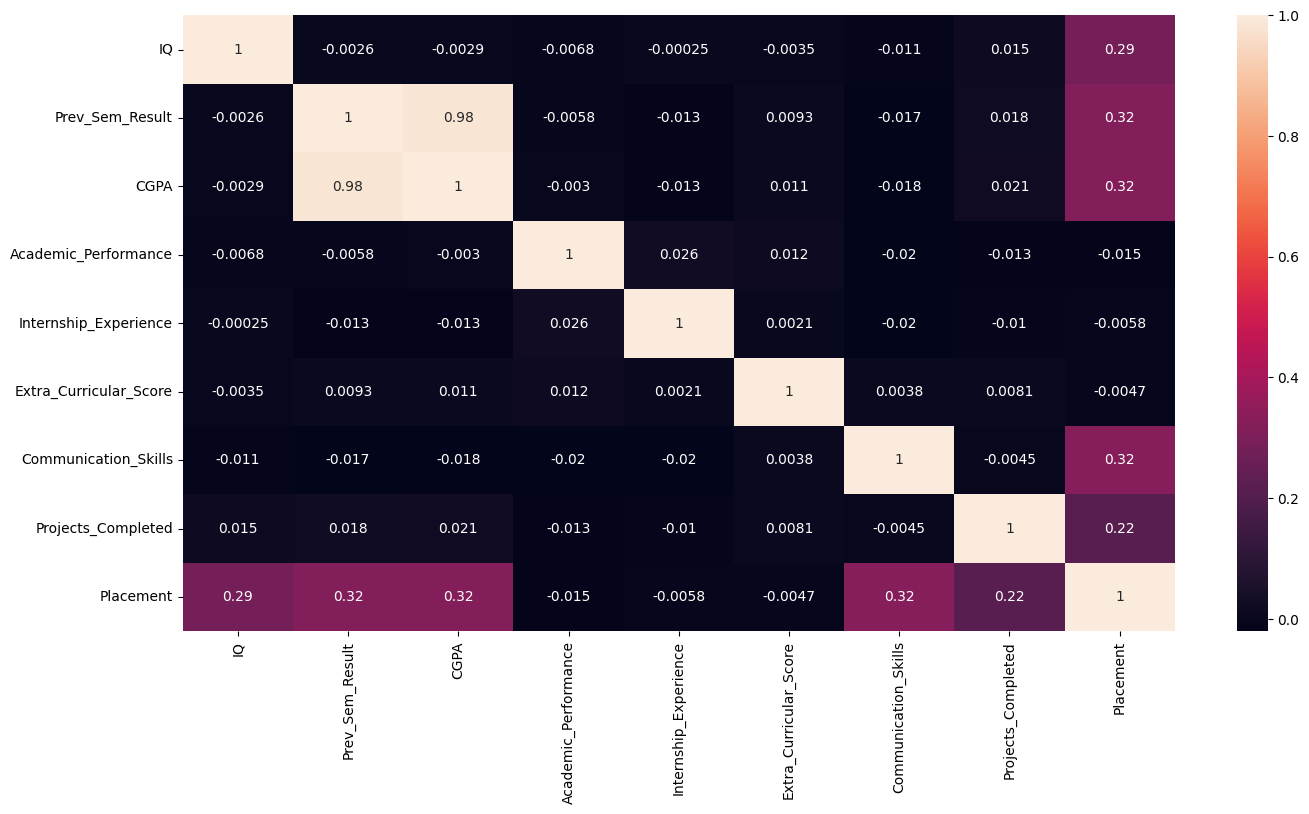

In [278]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)
# plt.savefig('Correlation Matrix')
plt.show()

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IQ                      10000 non-null  int64  
 1   Prev_Sem_Result         10000 non-null  float64
 2   CGPA                    10000 non-null  float64
 3   Academic_Performance    10000 non-null  int64  
 4   Internship_Experience   10000 non-null  int64  
 5   Extra_Curricular_Score  10000 non-null  int64  
 6   Communication_Skills    10000 non-null  int64  
 7   Projects_Completed      10000 non-null  int64  
 8   Placement               10000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 703.3 KB


In [280]:
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,0.396400,4.970900,5.561800,2.513400,0.165900
std,15.053101,1.447519,1.470141,2.873477,0.489174,3.160103,2.900866,1.715959,0.372009
min,41.000000,5.000000,4.540000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,0.000000,2.000000,3.000000,1.000000,0.000000
50%,99.000000,7.560000,7.550000,6.000000,0.000000,5.000000,6.000000,3.000000,0.000000
75%,110.000000,8.790000,8.770000,8.000000,1.000000,8.000000,8.000000,4.000000,0.000000
max,158.000000,10.000000,10.460000,10.000000,1.000000,10.000000,10.000000,5.000000,1.000000


In [281]:
x=df.iloc[:,:-1]
y=df['Placement']
x.shape , y.shape

((10000, 8), (10000,))

In [282]:
from imblearn.under_sampling import RandomUnderSampler
ru=RandomUnderSampler()
ru_x,ru_y=ru.fit_resample(x,y)
ru_x.shape, ru_y.shape

((3318, 8), (3318,))

In [283]:
from sklearn.model_selection import train_test_split

In [284]:
x_train,x_test,y_train,y_test=train_test_split(ru_x,ru_y,random_state=32,test_size=0.2)

In [285]:
from sklearn.linear_model import LogisticRegression

In [286]:
lr=LogisticRegression()
lr.fit(x_train,y_train)


c:\Users\PMLS\Desktop\Data_Science\college_std_placement\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [287]:
lr.score(x_test,y_test)*100,lr.score(x_train,y_train)*100

(84.93975903614458, 85.75734740015072)

In [288]:
from sklearn.metrics import confusion_matrix ,precision_score,recall_score,f1_score,roc_auc_score

In [289]:
y_pred=lr.predict(x_test)

In [290]:
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, lr.predict_proba(x_test)[:,1]))

Precision: 0.841642228739003
Recall: 0.8618618618618619
F1 Score: 0.8516320474777448
AUC Score: 0.9304773050996616


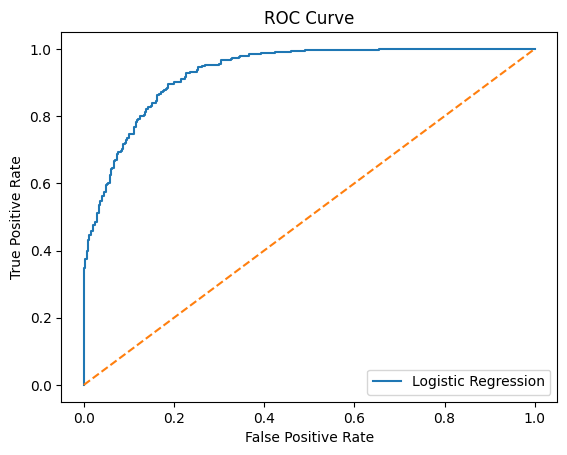

In [291]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.savefig('ROC Curve')
plt.legend()
plt.show()


In [292]:
cf=confusion_matrix(y_test,lr.predict(x_test))

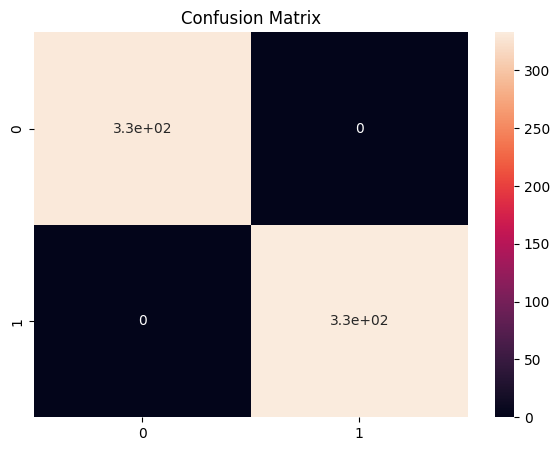

In [303]:
plt.figure(figsize=(7,5))
sns.heatmap(cf,annot=True)
plt.title('Confusion Matrix')
plt.savefig('Confusion Matrix Logistic Regression')
plt.show()

In [294]:
from sklearn.tree import DecisionTreeClassifier

In [295]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100 , dt.score(x_test,y_test)*100

(100.0, 100.0)

In [296]:
input=pd.DataFrame([[107,	6.61,	6.28,	8,	0,	8,	8,	4]],columns=x_train.columns)

In [297]:
dt.predict(input)

array([0])

In [298]:
y_pred=dt.predict(x_test)

In [299]:
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, dt.predict_proba(x_test)[:,1]))

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
AUC Score: 1.0


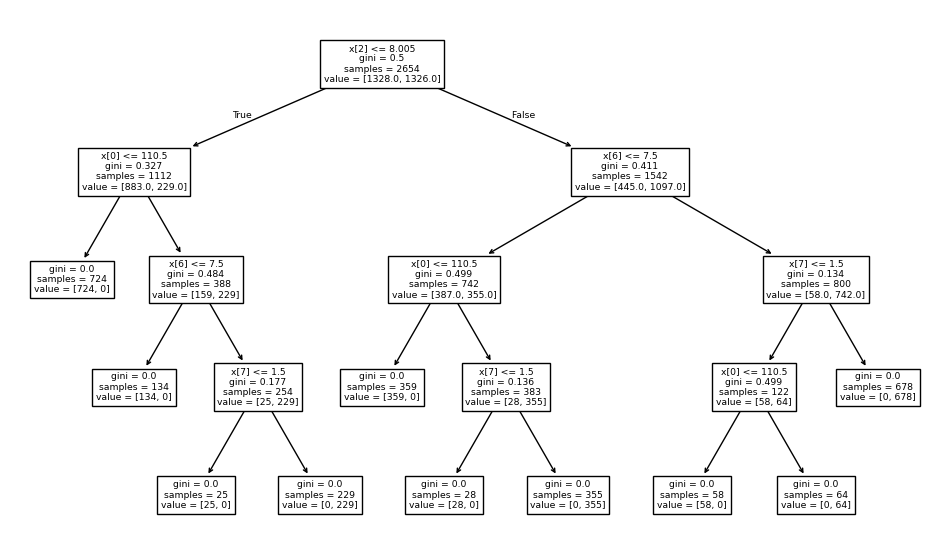

In [300]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,7))
plt.title('Decision Tree')
plot_tree(dt)
plt.show()

In [301]:
cf=confusion_matrix(y_test,y_pred)

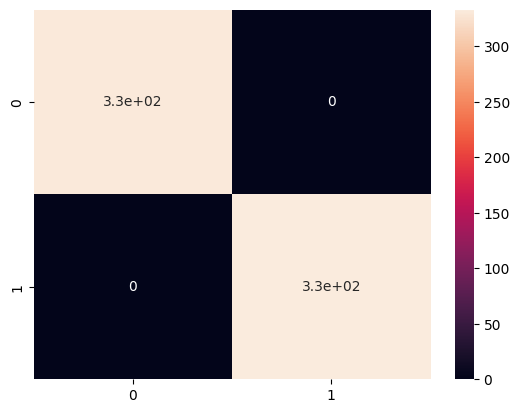

In [302]:
# plt.savefig('Confusion Matrix Decision Tree.jpg')
sns.heatmap(cf , annot=True)
plt.show()